# Assignment 1: Regression (Mexico’s Conditional Cash Transfers)

### Preliminaries

In [18]:
library(boot)
library(arm)

In [2]:
progresa <- read.csv('progresa.csv')
head(progresa)

,treatment,pri2000s,pri2000v,t2000,t2000r,pri1994,pan1994,prd1994,pri1994s,pri1994v,pan1994s,pan1994v,prd1994s,prd1994v,t1994,t1994r,votos1994,avgpoverty,pobtot1994,villages
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<int>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<int>,<int>
1,1,40.82397,73.15436,55.80524,60.56911,102,3,23,45.75989,77.27273,1.345879,2.272727,10.3184067,17.424242,60.56456,67.00508,135,5.0,541,4
2,1,22.44186,73.52381,31.22093,50.28736,245,18,14,15.11538,65.68365,1.110518,4.825737,0.8637358,3.753351,23.81443,55.83832,386,5.0,3289,2
3,1,38.93130,87.03072,47.02290,42.52540,52,8,4,7.98857,50.98039,1.229011,7.843137,0.6145054,3.921569,21.66131,35.54007,141,4.5,1320,2
4,1,31.16883,71.28713,45.02164,49.75369,58,6,7,29.16215,73.41772,3.016775,7.594937,3.5195705,8.860759,40.22366,56.83453,80,5.0,384,1
5,0,76.92308,78.94737,100.00000,48.40764,30,0,38,20.17038,43.47826,0.000000,0.000000,25.5491525,55.072464,46.39188,48.59155,69,5.0,307,1
6,0,23.85321,65.40881,37.38532,34.79212,128,0,20,32.81974,51.82186,0.000000,0.000000,5.1280838,8.097166,63.33183,68.61111,247,5.0,840,6


In [3]:
# seperate turnout based on treatment, and find mean
tapply(progresa$t2000, progresa$treatment, mean)
turn_treat.lm <- lm(t2000 ~ treatment, data = progresa)

# seperate support based on treatment, and find mean
tapply(progresa$pri2000s, progresa$treatment, mean)
support_treat.lm <- lm(pri2000s ~ treatment, data = progresa)

0        1 
63.81483 68.08451

0        1 
34.48895 38.11145

In [4]:
# regressing turnout on several independent variables 
turn_mult.lm <- lm(t2000 ~ treatment + avgpoverty + pobtot1994 + votos1994 + pri1994 + pan1994 + prd1994, data = progresa)

# regressing support on several independent variables 
support_mult.lm <- lm(pri2000s ~ treatment + avgpoverty + pobtot1994 + votos1994 + pri1994 + pan1994 + prd1994, 
                      data = progresa)

In [5]:
# regressing turnout on several independent variables with log 1994 population
turn_log.lm <- lm(t2000 ~ treatment + avgpoverty + log(pobtot1994) +t1994 + pri1994s + pan1994s + prd1994s, data = progresa)

# regressing support on several independent variables with log 1994 population
support_log.lm <- lm(pri2000s ~ treatment + avgpoverty + log(pobtot1994) +t1994 + pri1994s + pan1994s + prd1994s, 
                     data = progresa)

In [6]:
# get R^2 for each model
summary(turn_treat.lm)$adj.r.squared
summary(support_treat.lm)$adj.r.squared

summary(turn_mult.lm)$adj.r.squared
summary(support_mult.lm)$adj.r.squared

summary(turn_log.lm)$adj.r.squared
summary(support_log.lm)$adj.r.squared

[1] 0.001828564

[1] 0.006297673

[1] 0.06273301

[1] 0.2072516

[1] 0.6868331

[1] 0.5721621

### Graded 

In [7]:
# drop row with NAs
progresa <- na.omit(progresa)

**Question 1**\
The histograms below show the following patterns. Precinct population distributions for the control and treatment groups are alike. The majority of precincts in both groups have populations between 0 and 2500, with few precincts having populations greater than 5000. Average poverty indexes for both groups are also similar, with both having a range between 3 and 5, and the majority of precincts having an average poverty index nearer 5. There are very few precincts with an average poverty index less than 3.5 in both groups. Previous PRI support rates for each group follow a somewhat-normal distribution with a right skew. For both groups, the mode PRI support rate is ~40, and the majority of values lie below 80. However, though few, the treatment group has more higher PRI support precincts (more values above 80).

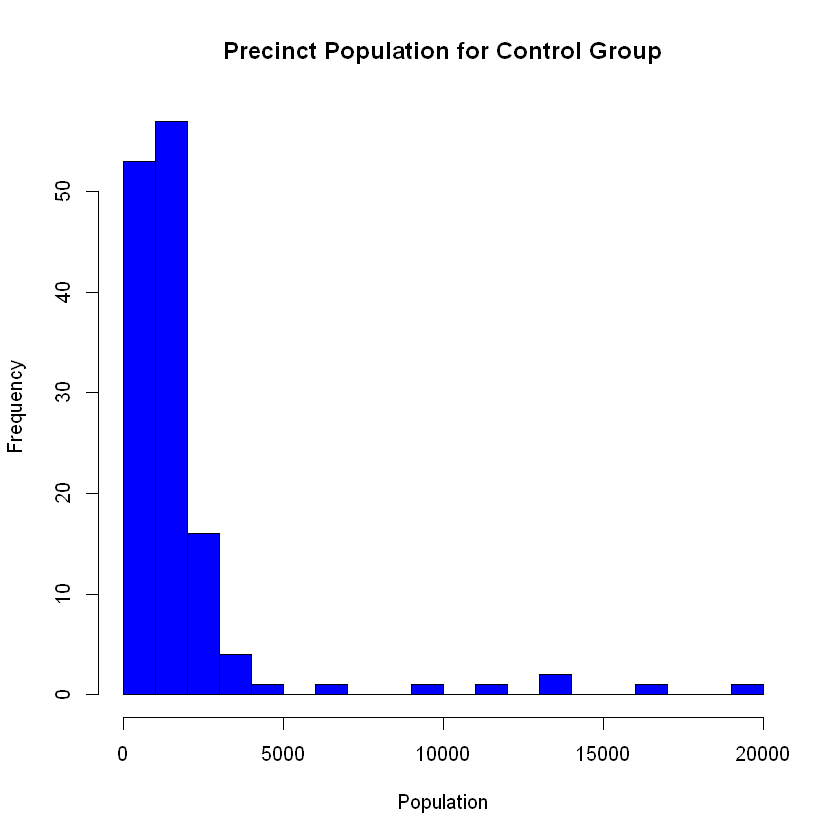

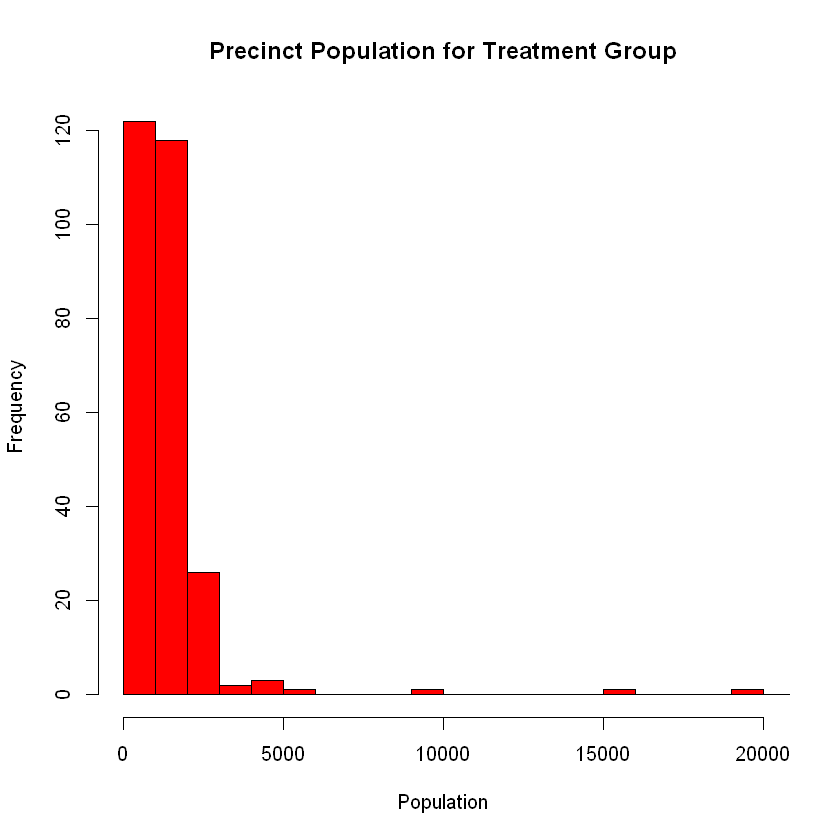

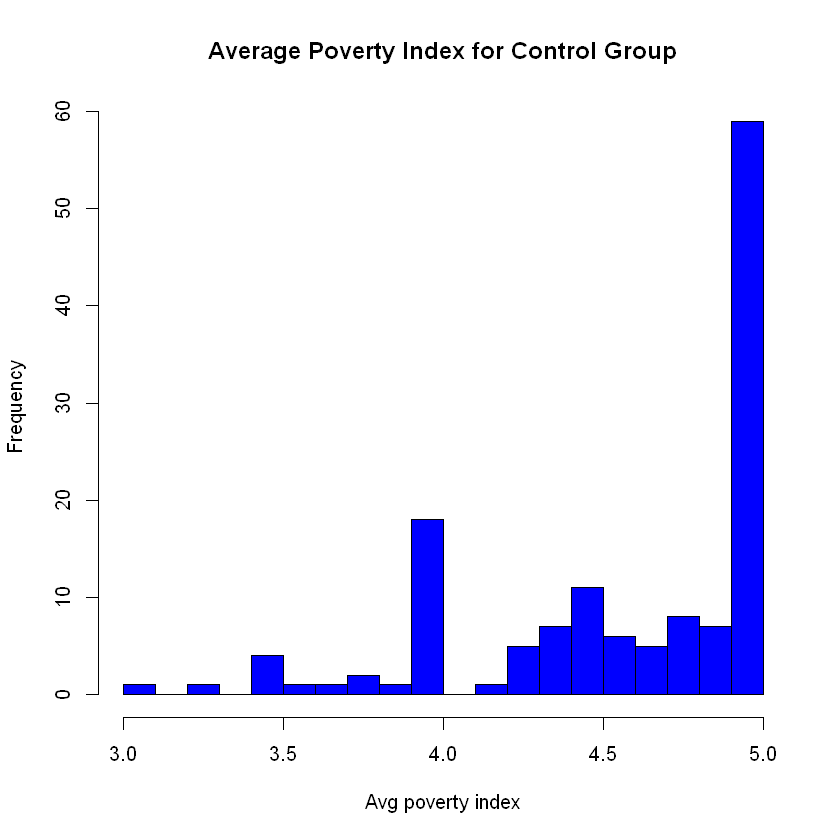

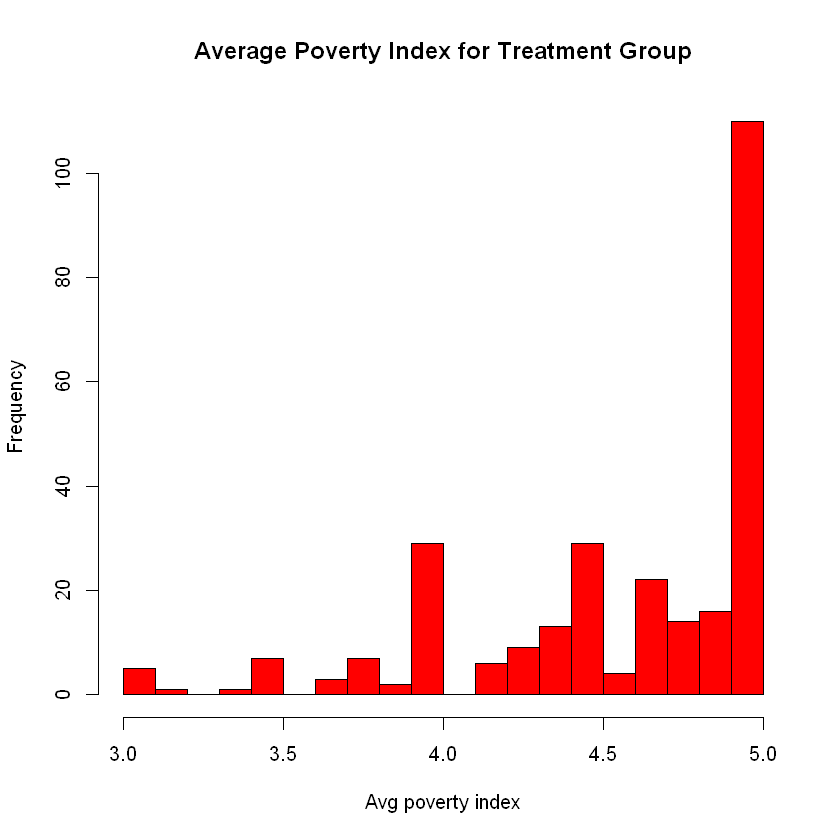

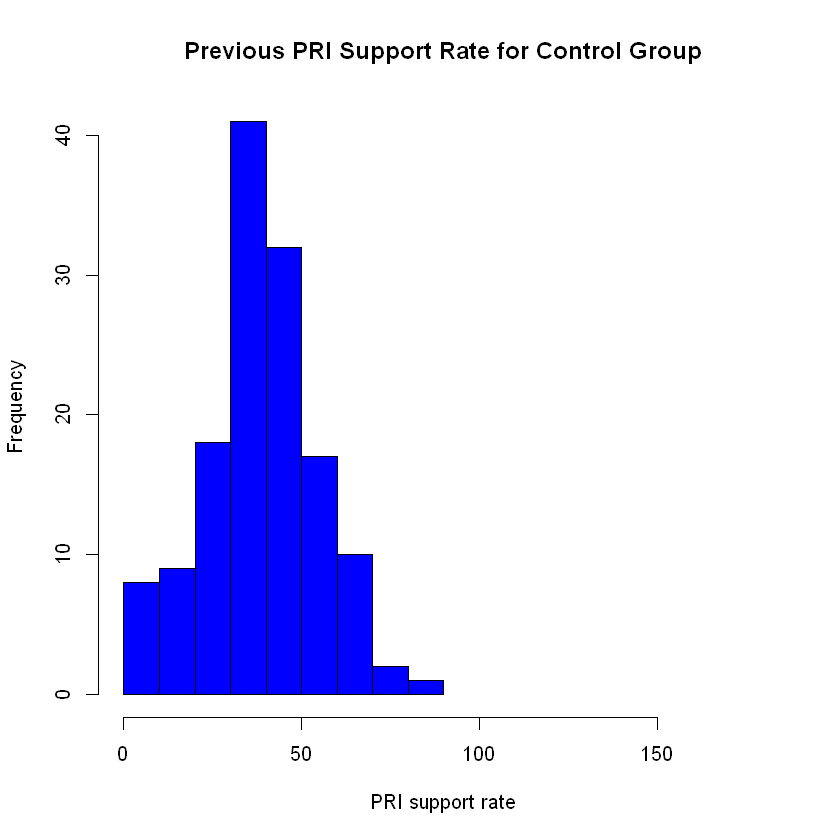

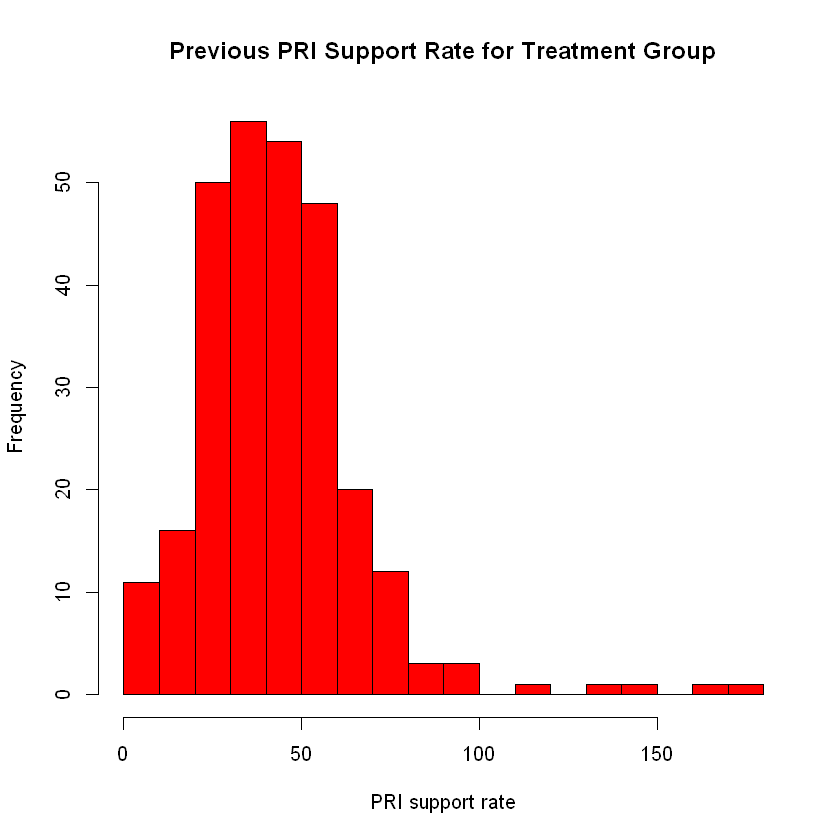

In [8]:
# precinct population (pobtot1994)
control_pop <- progresa$pobtot1994[progresa$treatment == 0]
treatment_pop <- progresa$pobtot1994[progresa$treatment == 1]
hist(control_pop, col = 'blue', breaks = 20, xlim = c(0, 20000), 
     main = 'Precinct Population for Control Group', xlab = 'Population')
hist(treatment_pop, col = 'red', breaks = 100, xlim = c(0, 20000), 
     main = 'Precinct Population for Treatment Group', xlab = 'Population')

# average poverty index (avgpoverty)
control_pov <- progresa$avgpoverty[progresa$treatment == 0]
treatment_pov <- progresa$avgpoverty[progresa$treatment == 1]
hist(control_pov, col = 'blue', breaks = 20, xlim = c(3, 5), 
     main = 'Average Poverty Index for Control Group', xlab = 'Avg poverty index')
hist(treatment_pov, col = 'red', breaks = 20, xlim = c(3, 5), 
     main = 'Average Poverty Index for Treatment Group', xlab = 'Avg poverty index')

# previous PRI support rate as a share of voting age population (pri1994s)
control_prev <- progresa$pri1994s[progresa$treatment == 0]
treatment_prev <- progresa$pri1994s[progresa$treatment == 1]
hist(control_prev, col = 'blue', breaks = 10, xlim = c(0, 180), 
     main = 'Previous PRI Support Rate for Control Group', xlab = 'PRI support rate')
hist(treatment_prev, col = 'red', breaks = 20, xlim = c(0, 180), 
     main = 'Previous PRI Support Rate for Treatment Group', xlab = 'PRI support rate')

**Question 2**\
*Turnout rate*\
For turnout rate, the linear regression will be given by:
$$33.47-0.28X_1-0.28X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.08X_7$$
Where $X_1$ = avgpoverty, $X_2$ = log(pobtot1994), $X_3$ = t1994r, $X_4$ = pri1994v, $X_5$ = pan1994v, $X_6$ = prd1994v, and $X_7$ = treatment.

We can substitute the values of the treatment variable (0, 1) into the equation to get the average treatment effect: 
$$(33.47-0.28X_1-0.28X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.08(1))-(33.47-0.28X_1-0.28X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.08(0))$$
$$=-1.08$$
The average treatment effect of $-1.08$ tells us that, for this specific set of predictor variables ($X_1=x_1$ to $x_6=x_6$), we would expect a decrease in average turnout rate by $1.08$ from the control to treatment group. In other words, we can say that this is the decrease in expected value from the control to treatment group, given the values of all other independent variables in the model.

We can also calculate a 95% confidence interval for this treatment effect as follows to quantify our uncertainty.
$$[-1.08-1.96*0.82, -1.08+1.96*0.82]$$
$$[-2.69, 0.53]$$
Since the true population treatment effect is unknown, the confidence interval tells us a possible range of average treatment effect values for the population.

*Support rate*\
For the support rate, we can calculate the average treatment effect in the same way to get:
$$0.80$$
This tells us that, for this specific set of predictor variables, we would expect an increase in average turnout rate by $0.80$ from the control to the treatment group. This is the decrease in expected value from control to treatment group, given the other independent variables in the model. The 95% confidence interval will be given by: $$[0.80-1.96*1.33, 0.80+1.96*1.33]=[-1.81, 3.41]$$ and is interpreted in the same way as above.

In [9]:
# regress turnout rate on poverty, population, and previous election vote shares
turn_rate.lm <- lm(t2000r ~ avgpoverty + log(pobtot1994) + t1994r + pri1994v + pan1994v + prd1994v + treatment, 
                   data = progresa)
summary(turn_rate.lm)

# regress support rate on poverty, population, and previous election vote shares
support_rate.lm <- lm(pri2000v ~ avgpoverty + log(pobtot1994) + t1994r + pri1994v + pan1994v + prd1994v + treatment, 
                      data = progresa)
summary(support_rate.lm)


Call:
lm(formula = t2000r ~ avgpoverty + log(pobtot1994) + t1994r + 
    pri1994v + pan1994v + prd1994v + treatment, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.041  -4.555   0.029   5.010  29.069 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     33.47237    8.85553   3.780 0.000180 ***
avgpoverty      -0.27734    0.88768  -0.312 0.754874    
log(pobtot1994) -0.27878    0.47487  -0.587 0.557487    
t1994r           0.22238    0.03102   7.168 3.59e-12 ***
pri1994v         0.12473    0.05489   2.272 0.023586 *  
pan1994v         0.27356    0.07257   3.770 0.000188 ***
prd1994v         0.11323    0.05790   1.955 0.051209 .  
treatment       -1.08094    0.81683  -1.323 0.186465    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 7.795 on 408 degrees of freedom
Multiple R-squared:  0.1809,	Adjusted R-squared:  0.1669 
F-statistic: 12.87 on 7 and 408 DF,  p-value: 5.603e-15



Call:
lm(formula = pri2000v ~ avgpoverty + log(pobtot1994) + t1994r + 
    pri1994v + pan1994v + prd1994v + treatment, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.876  -7.686   1.072   7.461  34.758 

Coefficients:
                Estimate Std. Error t value Pr(>|t|)    
(Intercept)     50.22721   14.43904   3.479 0.000558 ***
avgpoverty       3.19082    1.44737   2.205 0.028042 *  
log(pobtot1994) -2.59489    0.77428  -3.351 0.000879 ***
t1994r          -0.08612    0.05058  -1.703 0.089421 .  
pri1994v         0.35738    0.08950   3.993 7.73e-05 ***
pan1994v        -0.48863    0.11832  -4.130 4.41e-05 ***
prd1994v        -0.24158    0.09441  -2.559 0.010862 *  
treatment        0.80172    1.33185   0.602 0.547536    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 12.71 on 408 degrees of freedom
Multiple R-squared:  0.4836,	Adjusted R-squared:  0.4747 
F-statistic: 54.58 on 7 and 408 DF,  p-value: < 2.2e-16


**Question 3**\
The 95% confidence interval for predicted values for the turnout rate of precinct 11 is [39.9, 70.7]. This means that we predict values of the turnout rate for precinct 11 (given our independent variables) to be between 39.5 and 70.9. The 95% confidence interval for expected values for the turnout rate of precinct 11 is [52.7, 57.8]. This means that we expect the true mean turnout rate for precinct 11 to lie between 52.7 and 57.8. The interval for the expected value is narrower since we have averaged out the fundamental uncertainty that comes from variables other than those used in the regression, the stochastic component.

In [10]:
# set seed for reproducible results
set.seed(3)
sim1 <- sim(turn_rate.lm, n.sims = 10000)

# extract intercepts, slopes, and stdevs from simulation
intercepts <- sim1@coef[,1]
slopes <- sim1@coef[,2:8]
sigmas <- sim1@sigma

Predicted values 95% interval:

2.5%    97.5% 
39.91747 70.71124

Expected values 95% interval:

2.5%    97.5% 
52.71263 57.81475

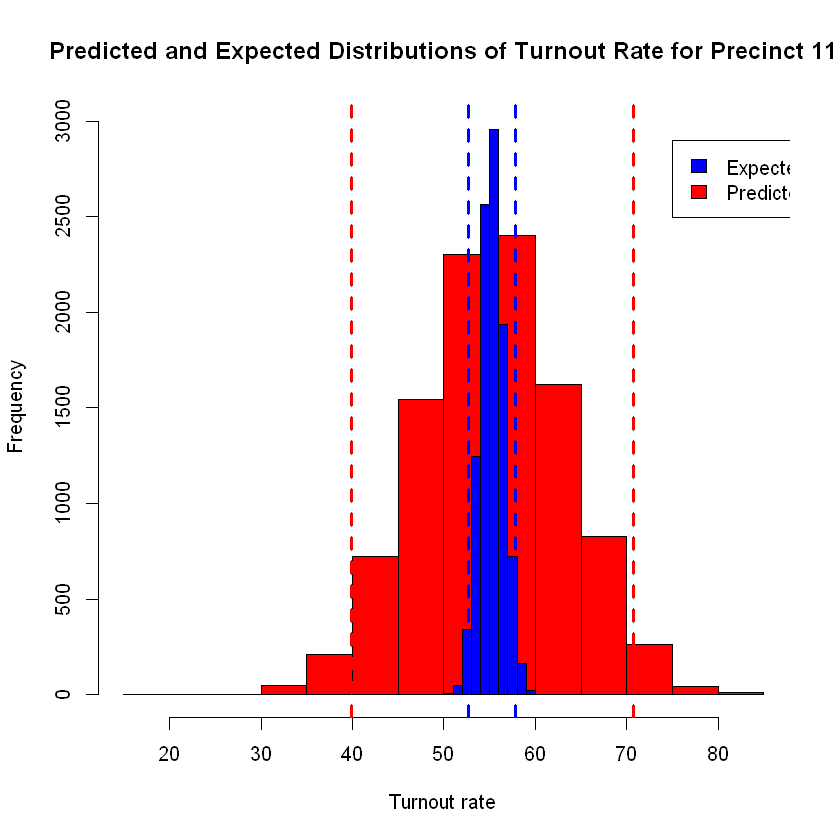

In [11]:
# extract precinct 11 (row 11) from dataset
precinct11 <- progresa[11, ]

pred_vals <- NA
expected_vals <- NA

for(i in 1:10000){
    expected = intercepts[i] + slopes[i,1]*precinct11$avgpoverty + 
    slopes[i,2]*log(precinct11$pobtot1994) + slopes[i,3]*precinct11$t1994r +
    slopes[i,4]*precinct11$pri1994v + slopes[i,5]*precinct11$pan1994v + 
    slopes[i,6]*precinct11$prd1994v + slopes[i,7]*precinct11$treatment
    noise <- rnorm(1, mean = 0, sd = sigmas[i])
    
    # encorporate stochastic component into predicted values only
    expected_vals[i] <- expected
    pred_vals[i] <- expected + noise
}

# confidence intervals
cat('Predicted values 95% interval:')
pred_interval <-  quantile(pred_vals, probs = c(0.025, 0.975))
pred_interval

cat('Expected values 95% interval:')
expected_interval <- quantile(expected_vals, probs = c(0.025, 0.975))
expected_interval

# store histogram objects to plot together
h1 <- hist(pred_vals, breaks = 20, plot = FALSE)
h2 <- hist(expected_vals, breaks = 10, plot = FALSE)

# plot overlay to compare predicted and expected distributions and 95% CIs
plot(h1, col = 'red', ylim = c(0, 3000), main = 'Predicted and Expected Distributions of Turnout Rate for Precinct 11',
    xlab = 'Turnout rate')
plot(h2, col = 'blue', add = TRUE)
legend(75, 2900, legend=c('Expected', 'Predicted'), fill = c('blue','red'))
abline(v = c(pred_interval, expected_interval), col=c('red', 'red', 'blue', 'blue'), lty=2, lwd=3)

**Question 4**\
a) The inclusion of an interaction term in the model allows it to have varying treatment effects for different values of the dummy variable; the average treatment effect will be different between precincts where the voting rate for PRD in 1994 (prd1994v) is greater than 50 and those where it is less than 50. In reality, the treatment wouldn't have the same impact on all precincts. By adding in an interaction term, we allow the model some more flexibility as it can now factor a variable into the treatment effect such that different precincts have different expected changes in voting turnout rate between control and treatment groups.

b) We can first write out the regression equation:
$$34.03-0.35X_1-0.29X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.40X_7-1.97X_8+4.34X_7X_8$$
Where $X_1$ = avgpoverty, $X_2$ = log(pobtot1994), $X_3$ = t1994r, $X_4$ = pri1994v, $X_5$ = pan1994v, $X_6$ = prd1994v, $X_7$ = treatment and $X_8$ = dummy variable for prd1994v>50.

Given that the average treatment effect is given by subtracting the regression equation where $X_7=0$ from where it equals $X_7=1$, we obtain the equation:
$$(34.03-0.35X_1-0.29X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.40(1)-1.97X_8+4.34(1)X_8) - (34.03-0.35X_1-0.29X_2+0.22X_3+0.12X_4+0.27X_5+0.11X_6-1.40(0)-1.97X_8+4.34(0)X_8)$$
$$=-1.40+4.34X_8$$

The average treatment effect equation is a function of the dummy variable indicating whether prd1994v is greater than 50. The first term, $-1.40$ tells us the intercept of the treatment effect; if the dummy variable is equal to 0, this is the expected value for the increase in turnout rate between control and treatment groups (given all other variables in the model). The coefficient of the dummy variable, $4.34$ tells us the increase in treatment effect we would expect with an increase of 1 in the dummy variable; if we change the dummy variable from 0 to 1, we would expect an increase of $4.34$ in the average treatment effect.

c) Though it is difficult to determine the statistical significance of the treatment effect solely from the graph below, there are some conclusions we can draw here. Firstly, when the PRD voting rate for 1994 is less than 50, there is much less variation in the treatment effect, most samples from the simulation lying between ~-4 and ~2. Conversely, when the PRD voting rate for 1994 is greater than 50, there is significantly more variation in the treatment effect, which lies between ~-5 and ~10. This suggests that we are more certain about the value of the intercept of the treatment effect than that of the slope, which is verified when we look at the p-values in the summary of the model (slope: 0.10, intercept: 0.16). Neither of the expected values are statistically significant to the 95% significance level. Given that the p-value is calculated from the standard error, which is in turn a function of the standard deviation of the data, we can see how the statistical significance is dependent on both the number of datapoints in the dataset, and treatment and treatment:prd1994_50 interaction variables.

In [12]:
# add dummy variable to dataframe
progresa$prd1994_50 <- as.integer(progresa$prd1994v > 50)

interact_turn.lm <- lm(t2000r ~ avgpoverty + log(pobtot1994) + t1994r + pri1994v + pan1994v + prd1994v + treatment + 
                       prd1994_50 + prd1994_50:treatment, data = progresa)
summary(interact_turn.lm)


Call:
lm(formula = t2000r ~ avgpoverty + log(pobtot1994) + t1994r + 
    pri1994v + pan1994v + prd1994v + treatment + prd1994_50 + 
    prd1994_50:treatment, data = progresa)

Residuals:
    Min      1Q  Median      3Q     Max 
-37.784  -4.545  -0.003   4.975  29.117 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)          34.02324    8.86447   3.838 0.000144 ***
avgpoverty           -0.35029    0.88926  -0.394 0.693852    
log(pobtot1994)      -0.29122    0.47581  -0.612 0.540848    
t1994r                0.22117    0.03103   7.127 4.71e-12 ***
pri1994v              0.12767    0.05493   2.324 0.020609 *  
pan1994v              0.27440    0.07258   3.781 0.000180 ***
prd1994v              0.10768    0.06218   1.732 0.084097 .  
treatment            -1.40499    0.84984  -1.653 0.099057 .  
prd1994_50           -1.96657    2.84329  -0.692 0.489551    
treatment:prd1994_50  4.34713    3.10870   1.398 0.162764    
---
Signif. codes:  0 '***' 0.001

In [13]:
set.seed(5)
sim2 <- sim(interact_turn.lm, n.sims = 1000)

# extract treatment effect intercepts and slopes from simulation
effect_intercepts <- sim2@coef[,8]
effect_slopes <- sim2@coef[,10]

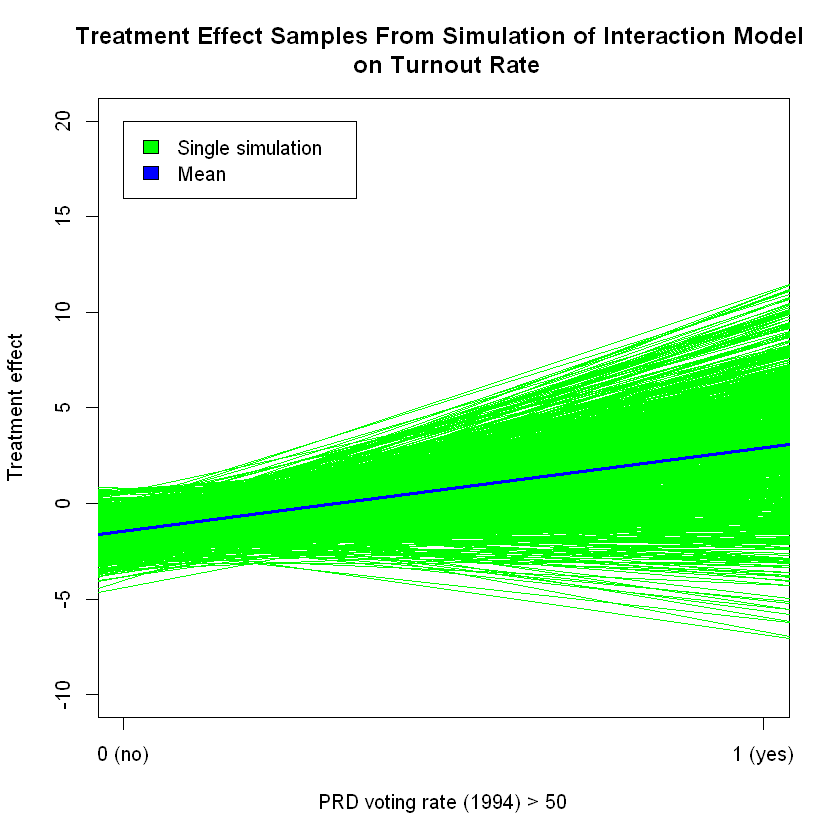

In [14]:
plot(x=NA, type='n', ylim=c(-10, 20), xaxt = 'n', xlim=c(0, 1), xlab='PRD voting rate (1994) > 50', 
     ylab='Treatment effect', main = 'Treatment Effect Samples From Simulation of Interaction Model \n on Turnout Rate')
axis(side = 1, at = c(0,1), labels = c('0 (no)','1 (yes)'))

# plot simulation treatment effect lines
for(i in 1:1000){
    abline(a = effect_intercepts[i], b = effect_slopes[i], col = 'green', lwd = 1)
}

# plot avg simulation treatment effect line
abline(a = mean(effect_intercepts), b = mean(effect_slopes), col = 'blue', lwd = 3)
legend(0, 20, legend=c('Single simulation', 'Mean'), fill = c('green','blue'))

**Question 5**\
The LOOCV error is calculated as a mean of the mean-squared error values for each dataset where 1 observation is removed from the training data. From the CV results below, we can see that the model without the extra independent variables (poverty squared and interaction between poverty squared and treatment) has a lower CV error (mean squared error). This means that we predict that model 1 will have a better out-of-sample performance; the test error will likely be lower for model 1 than model 2. Though the difference between the errors is very small, we might still prefer to choose model 1, since it has fewer predictors and thus is easier to interpret.

In [15]:
set.seed(123)

reg_model1 <- glm(t2000r ~ treatment + log(pobtot1994) + avgpoverty + treatment:avgpoverty, data = progresa)
cv.err1 <- cv.glm(data = progresa, glmfit = reg_model1, K = nrow(progresa))

reg_model2 <- glm(t2000r ~ treatment + log(pobtot1994) + avgpoverty + I(avgpoverty^2) + treatment:avgpoverty + 
                  I(treatment*avgpoverty^2), data = progresa)
cv.err2 <- cv.glm(data = progresa, glmfit = reg_model2, K = nrow(progresa))

# access the CV error as $delta from CV object
cat('Model 1 CV error:', cv.err1$delta[1], '\n')
cat('Model 2 CV error:', cv.err2$delta[1])

Model 1 CV error: 71.78602 
Model 2 CV error: 72.17417

*Optional Extra Credit*

From the analysis below, we see that the treatment effect and confidence intervals vary significantly across different poverty levels. For a poverty level of 2, the 95% confidence interval of the treatment effect is very wide ([-16.1, 3.4]), whereas for a poverty level of 5, this is [-2.6, 1.8]. This lack of confidence about lower poverty levels could come from the fact we have fewer observations in our dataset at lower levels (as we can see from the histograms in question 1). All the intervals across poverty levels between 2 and 5 span over 0, meaning we can't say for certain whether the treatment truly has a positive or negative effect on turnout rate across the population of precincts.

Note: given that the treatment effect is a function of poverty and no other variables, there were no values encorporated from precinct 11 specifically in this analysis (since we vary poverty here).

In [16]:
sim3 <- sim(reg_model1, n.sims = 1000)

# extract treatment effect intercepts and slopes from simulation
effect_slopes <- sim3@coef[,5]
effect_intercepts <- sim3@coef[,2]

95% confidence intervals: 
Poverty level 2 : -16.14488 3.414123 
Poverty level 2.5 : -13.26783 2.617414 
Poverty level 3 : -10.37862 1.961054 
Poverty level 3.5 : -7.445139 1.076762 
Poverty level 4 : -4.913493 0.5002744 
Poverty level 4.5 : -2.967954 0.4995616 
Poverty level 5 : -2.624801 1.846546 


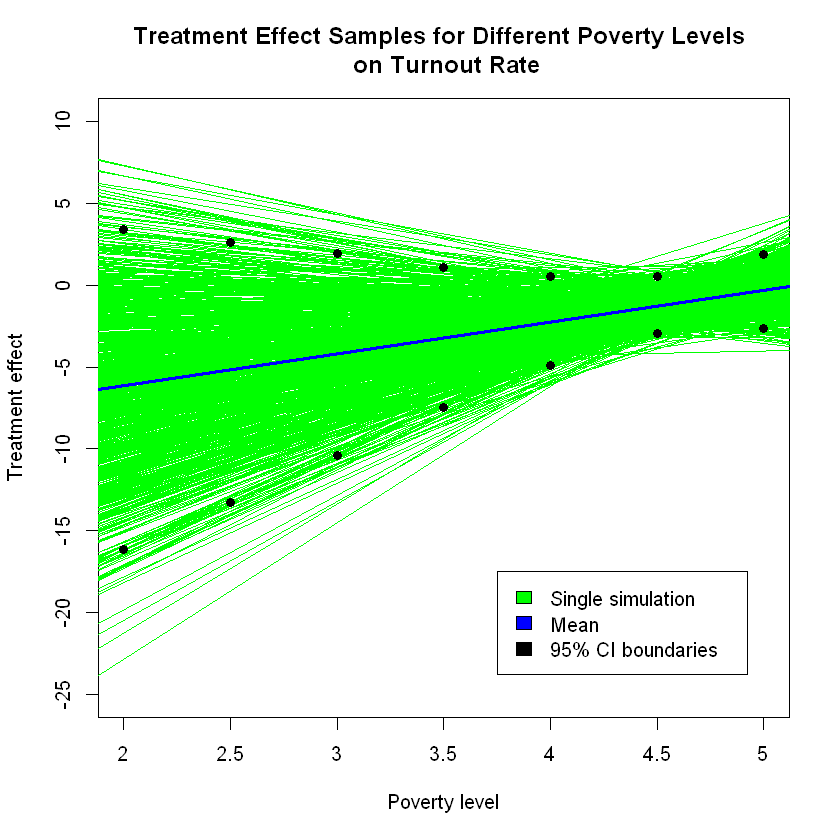

In [17]:
plot(x=NA, type='n', ylim=c(-25, 10), xaxt = 'n', xlim=c(2, 5), xlab='Poverty level', 
     ylab='Treatment effect', main = 'Treatment Effect Samples for Different Poverty Levels \n on Turnout Rate')
axis(side = 1, at = c(2, 2.5, 3, 3.5, 4, 4.5, 5), labels = c('2', '2.5', '3', '3.5', '4', '4.5', '5'))

# plot simulation treatment effect lines
for(i in 1:1000){
    abline(a = effect_intercepts[i], b = effect_slopes[i], col = 'green', lwd = 1)
}

# confidence intervals for treatment effect with different poverty levels
cat('95% confidence intervals: \n')
for(i in c(2, 2.5, 3, 3.5, 4, 4.5, 5)){
    cat('Poverty level', i, ':', quantile(effect_intercepts+effect_slopes*i, probs = c(0.025, 0.975)), '\n')
    points(i, quantile(effect_intercepts+effect_slopes*i, probs = 0.025), pch = 16)
    points(i, quantile(effect_intercepts+effect_slopes*i, probs = 0.975), pch = 16)
}
    
# plot avg simulation treatment effect line
abline(a = mean(effect_intercepts), b = mean(effect_slopes), col = 'blue', lwd = 3)
legend(3.75, -17.5, legend=c('Single simulation', 'Mean', '95% CI boundaries'), fill = c('green','blue','black'))